In this project, a basic linear regression was implemented on data generated by adding normally distributed noise to randomly selected points from a uniform distribution, U(-1,1). The likelihood, prior/posterior distribution, and data space were plotted for this data. As the number of observations increased, the radius of the prior/posterior plot decreased, indicating that it converged to the true a0 and a1 values. The true values for a0 and a1 are represented as a black plus sign on the plot. The data space showed that as the number of observations increased, it converged to the line of best fit (corresponding to the a0 and a1 values found in the prior/posterior plot) for the data points. Additionally, the evidence approximation was implemented to estimate alpha and beta. After taking a large number of observations (1000 observations), the alpha and beta values converged to their respective true values, even when the initial guesses for these values were highly inaccurate.

In the second part of the project, similar methods of linear regression were employed to approximate a sine wave. Data was generated in the same fashion, randomly selecting 25 points from a uniform distribution, U(-1,1). These points were passed as the argument of a sine function (ie sin(2pix)) and gaussian, 0 mean noise was added to synthetically generate our data. The “true” function was represented as a green sine wave on each plot (y = sin(2pix)). The same update equations were used as the previous part for the updated mN and SN’s, however the iota matrix was altered to use 9 basis functions (to better fit the curve). The estimated variance was added and subtracted from the mean vector, which was evaluated at every possible x in the function mNTphi(x). These were then used as the boundaries for 1 standard deviation (the red shading in each plot).

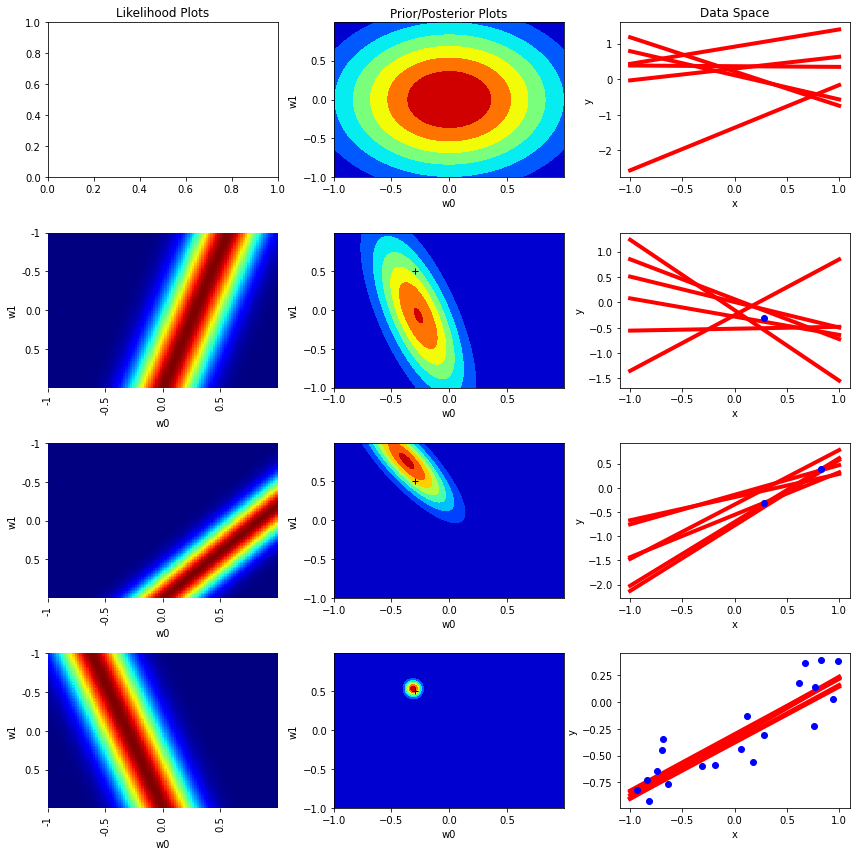

In [ ]:
#Project 2 | Linear Regression
#Layth Yassin and Husam Almanakly

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from scipy.stats import multivariate_normal
from scipy.stats import norm
#mpl.use('TkAgg')

#Figure 3.7 Code 
#Set up subplot and sizing
figure, axarr = plt.subplots(nrows=4, ncols=3)
figure.set_figheight(12)
figure.set_figwidth(12)

#Initial values for m0 and S0
m0 = np.zeros(2)
varX = 0.5
varY = 0.5
S0 = np.eye(2,2)
S0[0,0] = varX
S0[1,1] = varY

#Code from scipy.org to plot 3D distributions
ax = axarr[0,1]
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(m0, S0)
ax.contourf(x, y, rv.pdf(pos), cmap='jet')
ax.set_xlabel('w0')
ax.set_ylabel('w1')

#Make Observations using y = a0 + a1x
#Set up parameters 
a0 = -0.3
a1 = 0.5
alpha = 2.0
beta = 25
N = 1000

#Generate Data
noise = np.random.normal(0, np.sqrt(1/beta), N)
x = np.random.uniform(-1,1,N)
t = a0 + a1*x + noise

#Function to plot Prior/Posterior distribution
def updatePosterior(m, S, x, y, ax):
    s = 1
    x = np.atleast_2d(x)
    y = np.atleast_2d(y).T      #needed so that the first point can be treated as a matrix

    #Set up iota matrix
    iota = np.zeros((len(x[0]),len(m)))
    for i in range(0,len(iota)):
        iota[i,0] = 1
        iota[i,1] = x[:,i]
    
    #Update Equations - Eqs. 3.50 and 3.51
    SNinv = np.linalg.inv(S0) + beta*(iota.T@iota)
    SN = np.linalg.inv(SNinv)
    mN = SN@(np.linalg.inv(S0)@m0 + beta*iota.T@y)

    #Calculate the distribution and plot
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mN[:,0], SN)
    ax.contourf(x, y, rv.pdf(pos), cmap='jet')
    ax.set_ylabel('w1')
    ax.set_xlabel('w0')
    ax.plot(a0,a1, '+', color='black')
    
    return mN, SN, rv

#Call the function 3 times to plot the posterior distribution at different observations
m1, S1, rv1 = updatePosterior(m0, S0, x[0], t[0], axarr[1,1])
m2, S2, rv2 = updatePosterior(m1, S1, x[:2], t[:2], axarr[2,1])
m20, S20, rv3 = updatePosterior(m2, S2, x[:20], t[:20], axarr[3,1])

#Likelihood Plots
def likelihood(x, beta, ax):
    w0 = np.arange(-1,1, 0.02)
    w1 = np.arange(-1,1,0.02)
    X, Y = np.meshgrid(w0,w1)

    var = 1/beta

    #Evaluate the mean (w0 + w1*x) for all possible values of w 
    mu = np.zeros(100)
    mu = X+Y*x

    #Calculate the distribution and plot
    normal = np.sqrt(1/(2*np.pi*var))*np.exp(-1/(2*var)*(x-mu)**2)
    sb.heatmap(normal, cmap='jet', cbar=False, ax = ax)
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_xticks([0,25,50,75])
    ax.set_xticklabels(['-1','-0.5','0.0','0.5'])
    ax.set_yticks([0,25,50,75])
    ax.set_yticklabels(['-1','-0.5','0.0','0.5'])

#Call function three times for each likelihood plot
likelihood(x[0], beta, axarr[1,0])
likelihood(x[1], beta, axarr[2,0])
likelihood(x[19], beta, axarr[3,0])

#Data space plots
def dataSpace(ax, rv, x, t, N):
    #obtain 6 samples for W
    W = rv.rvs(size=6)
    #using each sample plot as a function of x 
    for row in W:
        xprime = np.linspace(-1,1,1000)
        y = row[0] + row[1]*xprime
        ax.plot(xprime, y, linewidth=4, color='red')
    
    #Plot the observations as circles 
    for i in range(0,N):
        ax.plot(x[i], t[i], 'o', color='blue')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

#Call the function for each plot
dataSpace(axarr[0,2], rv, x[0], t[0], 0)
dataSpace(axarr[1,2], rv1, x[:1], t[:1], 1)
dataSpace(axarr[2,2], rv2, x[:2], t[:2], 2)
dataSpace(axarr[3,2], rv3, x, t, 20)

#Titles and axis labels
axarr[0,0].set_title('Likelihood Plots')
axarr[0,1].set_title('Prior/Posterior Plots')
axarr[0,2].set_title('Data Space')

plt.subplots_adjust(bottom = 0.5)
figure.tight_layout()

In [ ]:
######      Stretch Goal Code   ######
#Evidence Estimation of Alpha and Beta Values 

#Initial Guesses for Alpha and Beta
alpha0 = 200
beta0 = 200
#Estimate function for looping each iteration
def estimate(alpha0, beta0, lamb):    
    lamb*=beta0
    #Update equations
    SNinv = np.linalg.inv(S0) + beta0*(iota0.T@iota0)
    SN = np.linalg.inv(SNinv)
    mN = SN@(np.linalg.inv(S0)@m0 + beta0*iota0.T@t)

    total = 0
    for j in range(len(x)):
        phi = iota0[j,:]
        total += (t[j] - mN.T@phi)**2
    
    #Estimate Gamma
    gamma = 0
    for item in lamb:
        gamma+=item/(item+alpha0)

    #Estimate alpha and beta
    alpha1 = gamma/(mN.T@mN)
    beta1 = 1/(total*1/(len(x) - gamma))
    return alpha1, beta1

#Set up iota matrix and calculate eigen values
iota0 = np.zeros((len(x),2))
for i in range(0,len(x)):
    iota0[i,0] = 1
    iota0[i,1] = x[i]
lamb, l = np.linalg.eig(iota0.T@iota0)

#Iterate estimations until convergence (defaulted to 100 iterations)
for i in range(0,100):
    alphaP, betaP = estimate(alpha0, beta0, lamb)
    alpha0 = alphaP
    beta0 = betaP
print("Estimated Alpha: " + str(alphaP))
print("Estimated Beta: " + str(betaP))

Estimated Alpha: 6.006944677999948
Estimated Beta: 23.78120204866184


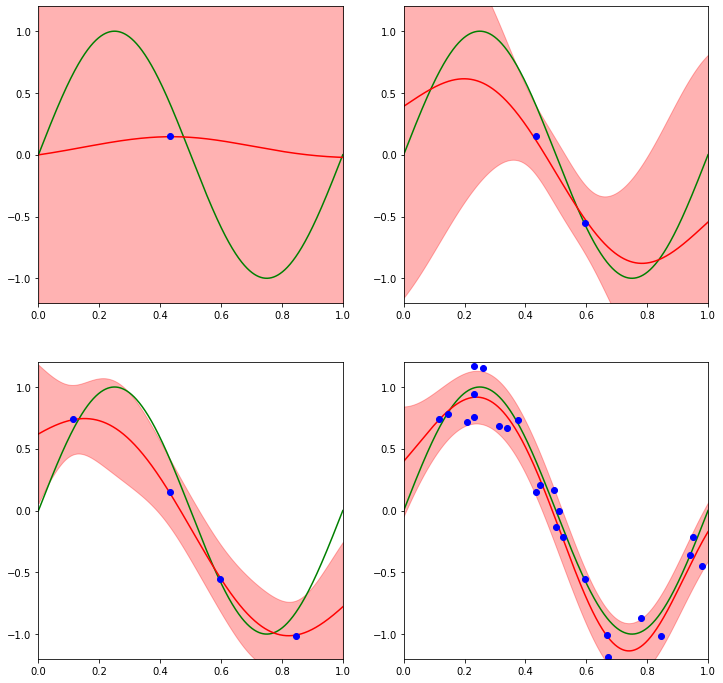

In [ ]:
#Figure 3.8 Code 
#Set up subplots and sizing
figure, axarr = plt.subplots(nrows = 2, ncols = 2)
figure.set_figheight(12)
figure.set_figwidth(12)


#MEAN IS RED LINE IN FIG3.8  - > just plotting the mean as a function of x 
#Set up number of observations and parameter values
N = 25
alpha = 2
beta = 25.0

#Generate data 
noise = np.random.normal(0, np.sqrt(1/beta), N)
x = np.random.uniform(0,1,N)
t = np.sin(2*np.pi*x) + noise

#Initial values for m0 and S0
m0 = np.zeros(9)
S0 = np.zeros((9, 9), float)
np.fill_diagonal(S0, alpha)

#Function for initializing iota
def iotaCalc(x, N):
    muj = np.linspace(-1,1,9)
    iota = np.zeros((N,9))
    s = 0.2
    for i in range(N):
        for j in range(9):
            iota[i, j] = np.exp(-(x[i]-muj[j])**2/(2*s**2))
    return iota

#Function to evaluate for each basis function
def eval(x):
    muj = np.linspace(-1,1,9)
    iota = np.zeros(9)
    s = 0.2
    for j in range(9):
        iota[j] = np.exp(-(x-muj[j])**2/(2*s**2))
    return iota

#function for the shading of each plot and the mean line 
def meanPlot(x, t, N, iota, ax):
    if (N == 1):
        iota = iota[0, :]
    else:
        iota = iota[:N, :]

    #Update Equations 
    SNinv = np.linalg.inv(S0) + beta*(iota.T@iota)
    SN = np.linalg.inv(SNinv)
    #To avoid using np.atleast_2d
    if (N == 1):
        mN = SN@(np.linalg.inv(S0)@m0 + beta*iota.T*t)/50
    else:
        mN = SN@(np.linalg.inv(S0)@m0 + beta*iota.T@t[:N])
    
    #set up h and mu functions (h is all possible x axis values)
    h = np.linspace(0,1, 1000)
    
    #Calculate mean and variance
    mu = np.zeros(1000)
    for i in range(0,1000):
        phi = eval(h[i])
        mu[i] = mN@phi.T

    sigN = np.zeros(1000)
    for i in range(0,1000):
        phi = eval(h[i])
        sigN[i] = np.sqrt(1/beta + phi@SN@phi.T)

    #Find boundary lines for shading
    shadedUp = mu + sigN
    shadedDown = mu - sigN

    #Fill in shading for the variance 
    ax.fill_between(h, shadedUp, shadedDown, alpha=0.3, interpolate = True, color = 'red')

    true = np.sin(2*np.pi*h)
    ax.plot(h,true, color = 'green')
    ax.plot(h,mu, color='red')
    ax.set_xlim(-0,1)
    ax.set_ylim(-1.2,1.2)
    if (N ==1): 
        ax.plot(x,t, 'o', color='blue')
        return
    for i in range(0,N):
        ax.plot(x[i], t[i], 'o', color='blue')
    return

iota = iotaCalc(x, N)

#Call the function 4 times for each plot
meanPlot(x[0], t[0], 1, iota, axarr[0,0])
meanPlot(x[:2], t[:2], 2, iota, axarr[0,1])
meanPlot(x[:5], t[:5], 4, iota, axarr[1,0])
meanPlot(x[:N+1], t[:N+1], N, iota, axarr[1,1])

plt.show()